In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, 
                             balanced_accuracy_score, fbeta_score, f1_score, roc_curve, auc, precision_recall_curve,
                             precision_score, recall_score)
from tabulate import tabulate
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

import sys
sys.path.append('/Users/miguelflores/Desktop/P1/practica1')
from funciones import funciones_auxiliares as f_aux

seed = 42

In [2]:
X_train = pd.read_csv('... /data/X_resampled.csv')
X_test = pd.read_csv('... /data/X_test_1.csv')

y_train = pd.read_csv('... /data/y_resampled.csv')
y_test = pd.read_csv('... /data/y_test_1.csv')

In [3]:
X_train = X_train.drop(columns=['SK_ID_CURR'])
X_test = X_test.drop(columns=['SK_ID_CURR'])

#### Con la finalidad de evaluar como es que emplear las variables adecuadas, te lleva a la obtención de los mismos resultados que conjuntos de datos donde se presentan más variables que no son simbólicas, a continuación se presenta un simple modelo para así obtener la precisión conforme a las diversas variables.

### *Base de datos con todas las variables*

#### A continuacion se presenta la base de datos codificada y escalada, solo que en esta contiene todas las varaibles.

In [4]:
X_train_c = pd.read_csv('... /data/X_train.csv').set_index('SK_ID_CURR')
X_test_c = pd.read_csv('... /data/X_test.csv').set_index('SK_ID_CURR')

y_train_c = pd.read_csv('... /data/y_train.csv').set_index('SK_ID_CURR')
y_test_c = pd.read_csv('... /data/y_test.csv').set_index('SK_ID_CURR')

In [5]:
datasets = {'Todas las variables': (X_train_c, X_test_c, y_train_c, y_test_c),
            'Selección de variables': (X_train, X_test, y_train, y_test)}

In [6]:
# Lista de los resultados
resultados = []

for conjunto_datos, (X_train, X_test, y_train, y_test) in datasets.items():
    # Manejar y_train con columna extra (Unnamed: 0)
    if isinstance(y_train, pd.DataFrame):
        if y_train.shape[1] > 1:  # Si hay más de una columna
            y_train = y_train.iloc[:, 1].values.ravel()  # Tomar solo la segunda columna (índice 1)
        else:
            y_train = y_train.iloc[:, 0].values.ravel()  # Si hay una columna, usar esa
    
    # Manejar y_test con columna extra (SK_ID_CURR o similar)
    if isinstance(y_test, pd.DataFrame):
        if y_test.shape[1] > 1:  # Si hay más de una columna
            y_test = y_test.iloc[:, -1].values.ravel()  # Tomar la última columna
        else:
            y_test = y_test.iloc[:, 0].values.ravel()  # Si hay una columna, usar esa
    # Crear y entrnar el modelo
    modelo_prueba = DummyClassifier(strategy = 'most_frequent')
    modelo_prueba.fit(X_train, y_train)

    # Predicciones
    y_pred = modelo_prueba.predict(X_test)

    # Métrica
    accuracy = accuracy_score(y_test, y_pred)

    # Registrar resultados
    resultados.append({
        'Conjunto de datos': conjunto_datos,
        'Accuracy': accuracy})

# Generar dataframe
df_resultados = pd.DataFrame(resultados)

# Impresion
print("\nResultados de la evaluación de modelos:")
print(df_resultados)


Resultados de la evaluación de modelos:
        Conjunto de datos  Accuracy
0     Todas las variables  0.919272
1  Selección de variables  0.919272


#### Con la finalidad de realizar este proceso, primeramente debemos de establecer un diccionario, donde se encontraran las variables de cada conjunto de datos (filtrado y completo), para posteriormente aplicar un modelo Dummy ('tonto'), con el cual obtenemos la misma precisión. Indicando que la selección de variables fue correcta al tomar las variables más representativas para aplicarlas a un modelo.

## **Modelos**

In [7]:
X_train.columns = X_train.columns.str.replace(r'[^a-zA-Z0-9_]', '_', regex=True)
X_test.columns = X_test.columns.str.replace(r'[^a-zA-Z0-9_]', '_', regex=True)

[LightGBM] [Warning] Unknown parameter: is_unbalanced
[LightGBM] [Warning] Unknown parameter: is_unbalanced
[LightGBM] [Info] Number of positive: 19860, number of negative: 19860
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002848 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3792
[LightGBM] [Info] Number of data points in the train set: 39720, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Unknown parameter: is_unbalanced

=== Resultados para: LGBMClassifier ===
[LightGBM] [Warning] Unknown parameter: is_unbalanced
Score del modelo: 0.714

--- Métricas estándar ---
Accuracy: 0.71379
Balanced Accuracy: 0.68660
Recall (Sensibilidad): 0.65418
Specificity: 0.71902
Precision: 0.16975
F1 Score: 0.26955
F2 Score: 0.41647

--- Métricas de errores ---
False Di

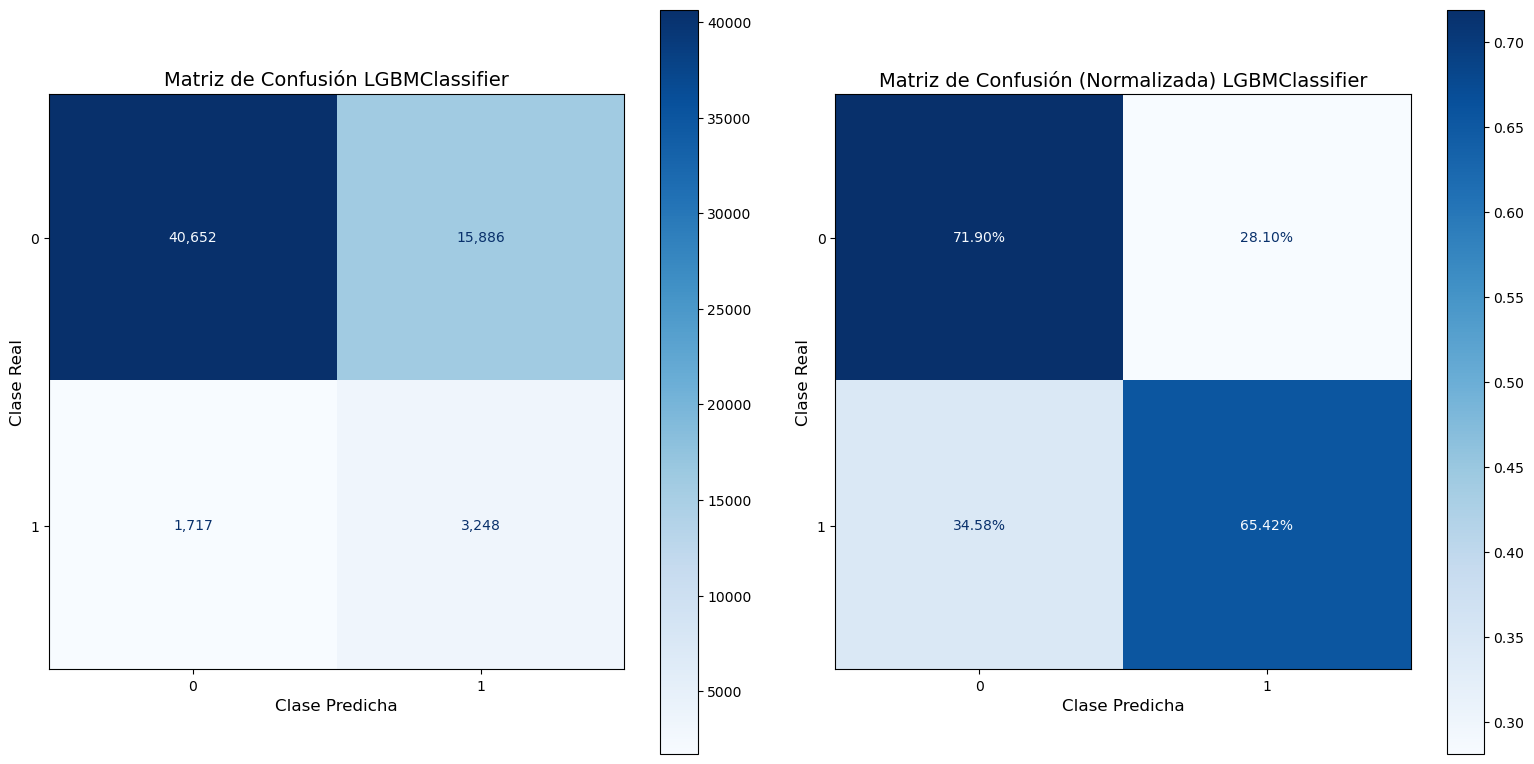

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

=== Resultados para: XGBClassifier ===
Score del modelo: 0.709

--- Métricas estándar ---
Accuracy: 0.70888
Balanced Accuracy: 0.67226
Recall (Sensibilidad): 0.62860
Specificity: 0.71593
Precision: 0.16270
F1 Score: 0.25850
F2 Score: 0.39970

--- Métricas de errores ---
False Discovery Rate (FDR): 0.83730
False Positive Rate (FPR): 0.28407
False Omission Rate (FOR): 0.04357
False Negative Rate (FNR): 0.37140

Matriz de Confusión:


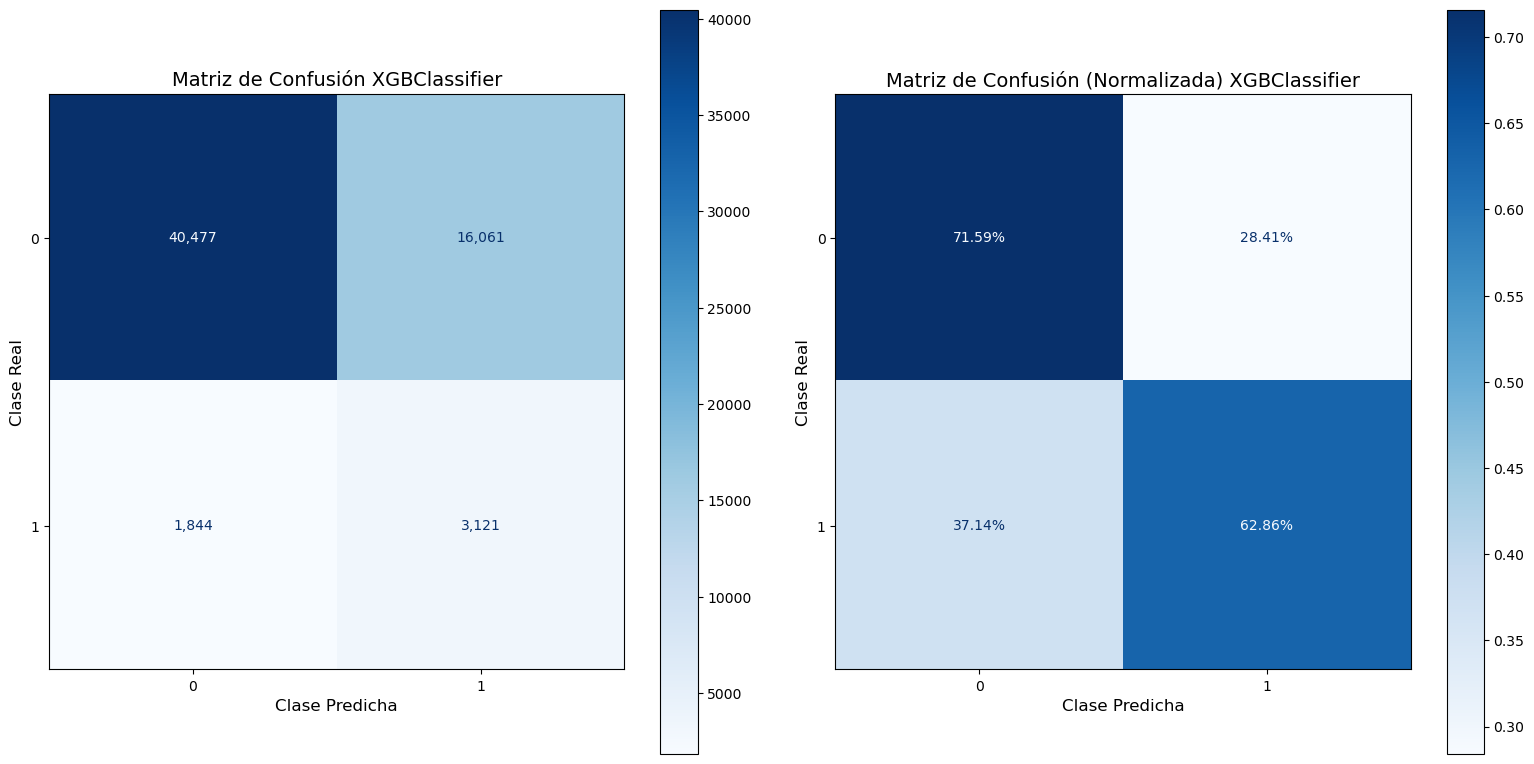

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

=== Resultados para: RandomForestClassifier ===
Score del modelo: 0.706

--- Métricas estándar ---
Accuracy: 0.70580
Balanced Accuracy: 0.67757
Recall (Sensibilidad): 0.64391
Specificity: 0.71124
Precision: 0.16376
F1 Score: 0.26111
F2 Score: 0.40589

--- Métricas de errores ---
False Discovery Rate (FDR): 0.83624
False Positive Rate (FPR): 0.28876
False Omission Rate (FOR): 0.04212
False Negative Rate (FNR): 0.35609

Matriz de Confusión:


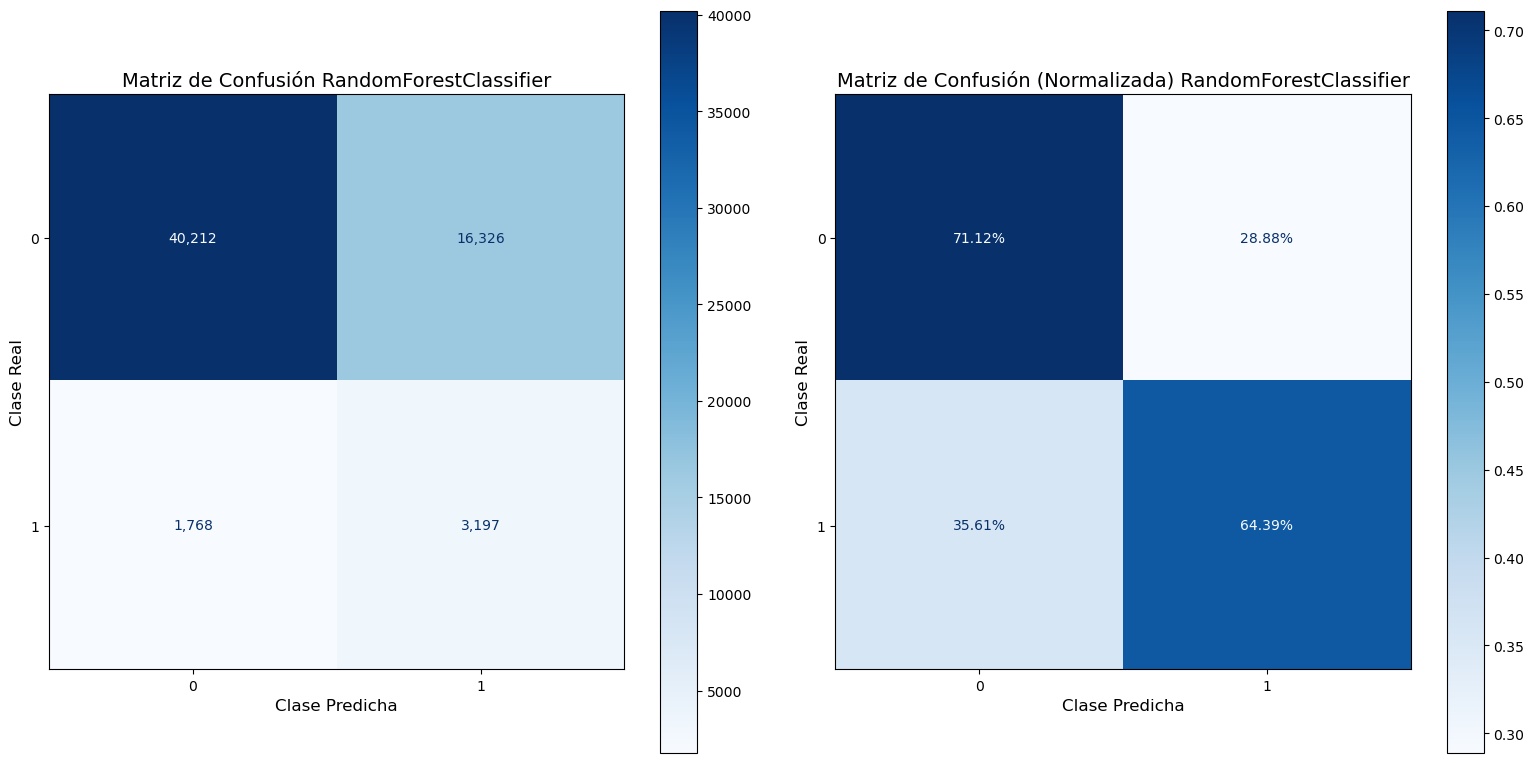

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

=== Resultados para: LogisticRegression ===
Score del modelo: 0.689

--- Métricas estándar ---
Accuracy: 0.68860
Balanced Accuracy: 0.68071
Recall (Sensibilidad): 0.67130
Specificity: 0.69012
Precision: 0.15983
F1 Score: 0.25819
F2 Score: 0.40933

--- Métricas de errores ---
False Discovery Rate (FDR): 0.84017
False Positive Rate (FPR): 0.30988
False Omission Rate (FOR): 0.04015
False Negative Rate (FNR): 0.32870

Matriz de Confusión:


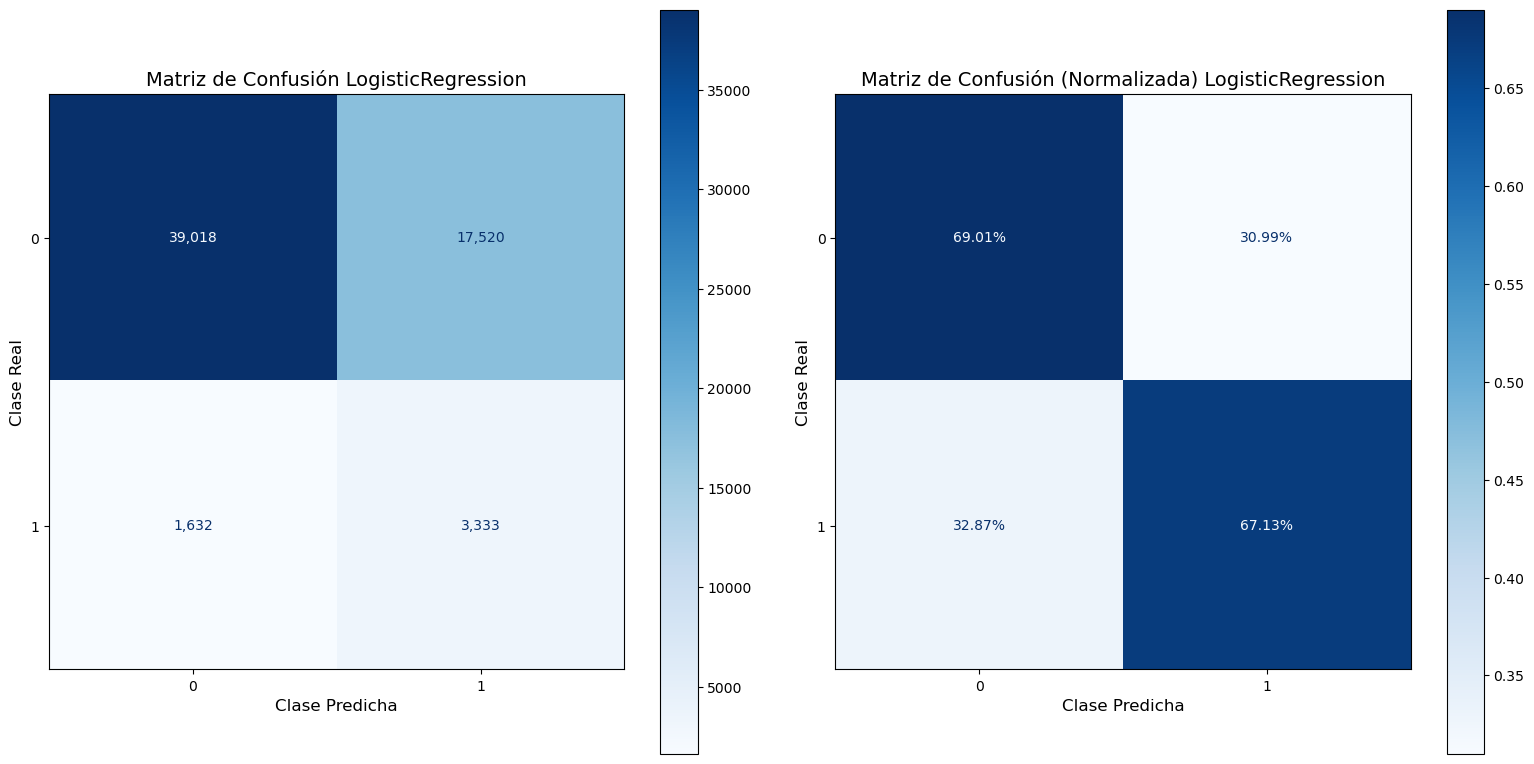

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

=== Comparación de modelos ===
+------------------------+------------+---------------------+----------+---------------+-------------+------------+------------+----------+----------+-----------+----------+
| Modelo                 |   Accuracy |   Balanced Accuracy |   Recall |   Specificity |   Precision |   F1 Score |   F2 Score |      FDR |      FPR |       FOR |      FNR |
+========================+============+=====================+==========+===============+=============+============+============+==========+==========+===========+==========+
| LGBMClassifier         |   0.713786 |            0.6866   | 0.654179 |      0.719021 |    0.16975  |   0.269555 |   0.416474 | 0.83025  | 0.280979 | 0.0405249 | 0.345821 |
+------------------------+------------+---------------------+----------+---------------+-------------+

In [8]:
# Lista de clasificadores
models = [
    LGBMClassifier(is_unbalanced = True, random_state = seed),
    XGBClassifier(eval_metric='logloss', random_state = seed, scale_pos_weight = (np.sum(y_train == 0) / np.sum(y_train == 1))),
    RandomForestClassifier(class_weight = 'balanced', random_state = seed),
    LogisticRegression(class_weight = 'balanced', random_state = seed, solver = 'liblinear')
]

# Lista para almacenar resultados
results = []

# Bucle para entrenar, evaluar y mostrar métricas y matrices
for model in models:
    # Crear pipeline con el clasificador actual
    pipe = Pipeline(steps=[('classifier', model)])
    
    y_train = y_train.ravel()

    # Entrenar el modelo
    pipe.fit(X_train, y_train)
    
    # Predecir en el conjunto de prueba
    y_pred = pipe.predict(X_test)
    
    # Calcular matriz de confusión y métricas
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    fdr = fp / (fp + tp)
    fpr = fp / (fp + tn)
    for_ = fn / (fn + tn)
    fnr = fn / (fn + tp)
    
    # Mostrar resultados divididos
    print(f"\n=== Resultados para: {model.__class__.__name__} ===")
    print(f"Score del modelo: {pipe.score(X_test, y_test):.3f}")
    
    # Métricas estándar
    print("\n--- Métricas estándar ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.5f}")
    print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred):.5f}")
    print(f"Recall (Sensibilidad): {recall_score(y_test, y_pred):.5f}")
    print(f"Specificity: {specificity:.5f}")
    print(f"Precision: {precision_score(y_test, y_pred):.5f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.5f}")
    print(f"F2 Score: {fbeta_score(y_test, y_pred, beta=2):.5f}")
    
    # Métricas de errores
    print("\n--- Métricas de errores ---")
    print(f"False Discovery Rate (FDR): {fdr:.5f}")
    print(f"False Positive Rate (FPR): {fpr:.5f}")
    print(f"False Omission Rate (FOR): {for_:.5f}")
    print(f"False Negative Rate (FNR): {fnr:.5f}")
    
    # Almacenar métricas en una lista
    results.append({
        'Modelo': model.__class__.__name__,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Balanced Accuracy': balanced_accuracy_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'Specificity': specificity,
        'Precision': precision_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'F2 Score': fbeta_score(y_test, y_pred, beta=2),
        'FDR': fdr,
        'FPR': fpr,
        'FOR': for_,
        'FNR': fnr
    })
    
    # Mostrar matriz de confusión
    print("\nMatriz de Confusión:")
    f_aux.m_confusion(y_test, y_pred, modelo=model.__class__.__name__)
    print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------")

# Convertir resultados en un DataFrame
results_df = pd.DataFrame(results)

# Mostrar tabla comparativa al final
print("\n=== Comparación de modelos ===")
print(tabulate(results_df, headers='keys', tablefmt='grid', showindex=False))


#### Por medio de la anterior tabla, es posible determinar que el modelo de LGBMCLassifier presenta un mejor valor de accuracy (0.7138) y un buen equilibrio entre recall (0.6542) y specificity (0.719). En lo que respecta a las otras métricas, F1 Score y el accuracy son muy relevantes para presentar un modelo equilibrado, por lo que LGBM es el candidato más prometedor para continuar en este proceso. Un punto importante es que el FDR (False Discovery Rate) y el FPR ( False Positive Rate) son bastante altos en todos los modelos, lo que simboliza que se presentan muchos falsos positivos. 

## **Modelo**

In [9]:
param_grid = {
    'classifier__n_estimators': [50, 100, 200, 300],
    'classifier__max_depth': [3, 5, 7, 10],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'classifier__num_leaves': [20, 31, 40],
    'classifier__subsample': [0.6, 0.8, 1.0],
    'classifier__colsample_bytree': [0.6, 0.8, 1.0]
}

In [10]:
# Crear pipeline
pipe = Pipeline(steps = [('classifier', LGBMClassifier(is_unbalanced = True, random_state = seed))])

# Configurar búsqueda de hiperparámetros
modelo_optimo = RandomizedSearchCV(
    pipe, 
    param_distributions = param_grid, 
    n_iter = 60,  # Número de combinaciones a probar
    scoring = 'recall',  # Métrica de evaluación
    cv = 5,  # Número de particiones para validación cruzada
    random_state = seed,
    verbose = 1
)

# Entrenar
modelo_optimo.fit(X_train, y_train)

# Resultados
print("Mejores parámetros:", modelo_optimo.best_params_)
print("Mejor puntuación:", modelo_optimo.best_score_)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
[LightGBM] [Warning] Unknown parameter: is_unbalanced
[LightGBM] [Warning] Unknown parameter: is_unbalanced
[LightGBM] [Info] Number of positive: 15888, number of negative: 15888
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3791
[LightGBM] [Info] Number of data points in the train set: 31776, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

#### Inicialmente para encontrar el modelo más óptimo, es fundamental establecer un diccionario de hiperparámetros. Donde posteriormente un código configura y ejecuta una búsqueda aleatoria de hiperparámetros para un modelo LGBMClassifier dentro de un pipeline utilizando RandomizedSearchCV. Esto permite encontrar el mejor conjunto de parámetros para optimizar el modelo basado en la métrica recall. Al final, imprime los mejores parámetros y la mejor puntuación obtenida.

#### Este enfoque de optimización de hiperparámetros ayuda a mejorar el rendimiento del modelo sin tener que probar manualmente todas las combinaciones posibles, lo que es más eficiente cuando se tienen muchos parámetros. En la siguiente caja de código, es posible visualizar como resultante las métricas de evaluación del mejor modelo

In [11]:
prediccion = modelo_optimo.predict(X_test)
print('Reporte de clasificación')
print(classification_report(y_test, prediccion))

[LightGBM] [Warning] Unknown parameter: is_unbalanced
Reporte de clasificación
              precision    recall  f1-score   support

           0       0.96      0.75      0.84     56538
           1       0.18      0.62      0.28      4965

    accuracy                           0.74     61503
   macro avg       0.57      0.68      0.56     61503
weighted avg       0.89      0.74      0.80     61503



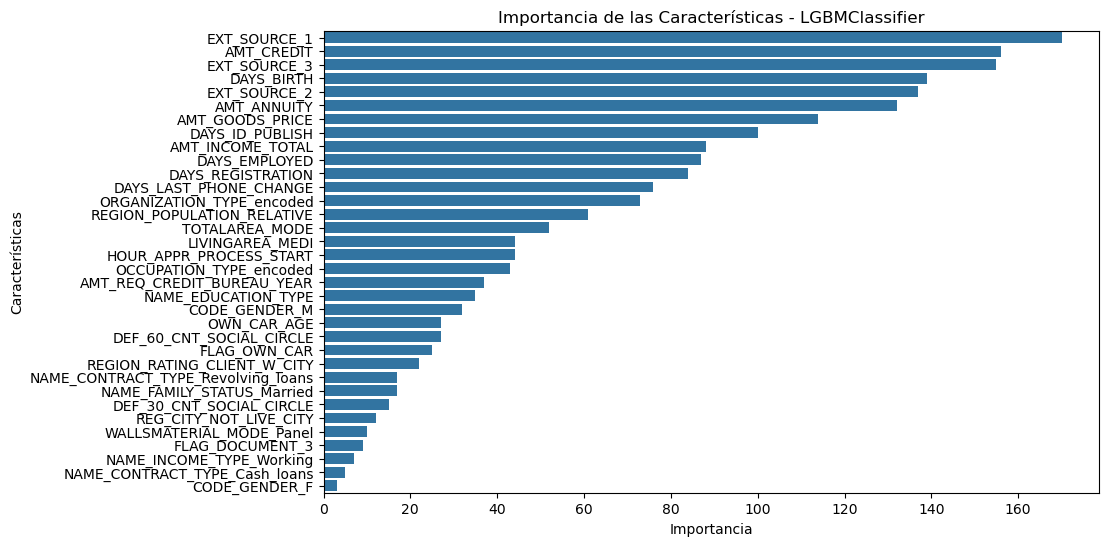

In [12]:
mejor_modelo = modelo_optimo.best_estimator_ 

# Obtener las importancias de las características
importancia = mejor_modelo.named_steps['classifier'].feature_importances_

# Suponiendo que X_train es un DataFrame y contiene las características
feature_names = X_train.columns  # Si X_train es un DataFrame, ajusta según el tipo de datos que tengas

# Ordenar las características por importancia
indices = np.argsort(importancia)[::-1]

# Crear un DataFrame con las importancias de las características
importance_df = pd.DataFrame({
    'Feature': feature_names[indices],
    'Importance': importancia[indices]
})

# Graficar las importancias de las características
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Importancia de las Características - LGBMClassifier')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

#### Por medio del anterior gráfico, es posible visualizar de manera clara cúales son las características más importantes para el modelo, lo que ayuda a interpretar el comportamiento de este, tomar decisiones sobre la selección de características y mejorar el modelo si es necesario. 

In [13]:
recall_score(y_test, prediccion)

0.6177240684793555


#### El **recall** de 0.6177 indica que el modelo tiene un rendimiento moderado en identificar instancias positivas, ya que acierta aproximadamente el 62% de los casos positivos. Aunque no es un valor excepcional, sugiere que el modelo es relativamente efectivo en la detección de eventos positivos, lo cual es crucial en situaciones donde los falsos negativos (casos positivos que se clasifican erróneamente como negativos) pueden tener consecuencias graves. 

In [14]:
precision_score(y_test, prediccion)

0.17797249463239134

#### Dado que el conjunto de datos está altamente desbalanceado, con un 91% de las instancias pertenecientes a la clase negativa (0) y solo un 9% a la clase positiva (1), esto ayuda a explicar por qué la precision es tan baja (0.17797). En conjuntos de datos desbalanceados, los modelos suelen inclinarse hacia predecir más instancias de la clase mayoritaria (en este caso, la clase 0), ya que esto maximiza el accuracy de manera superficial. Sin embargo, esto resulta en un mal desempeño para la clase minoritaria (1), como se observa en el bajo valor de precisión.

## **Matrices de confusión**

[LightGBM] [Warning] Unknown parameter: is_unbalanced


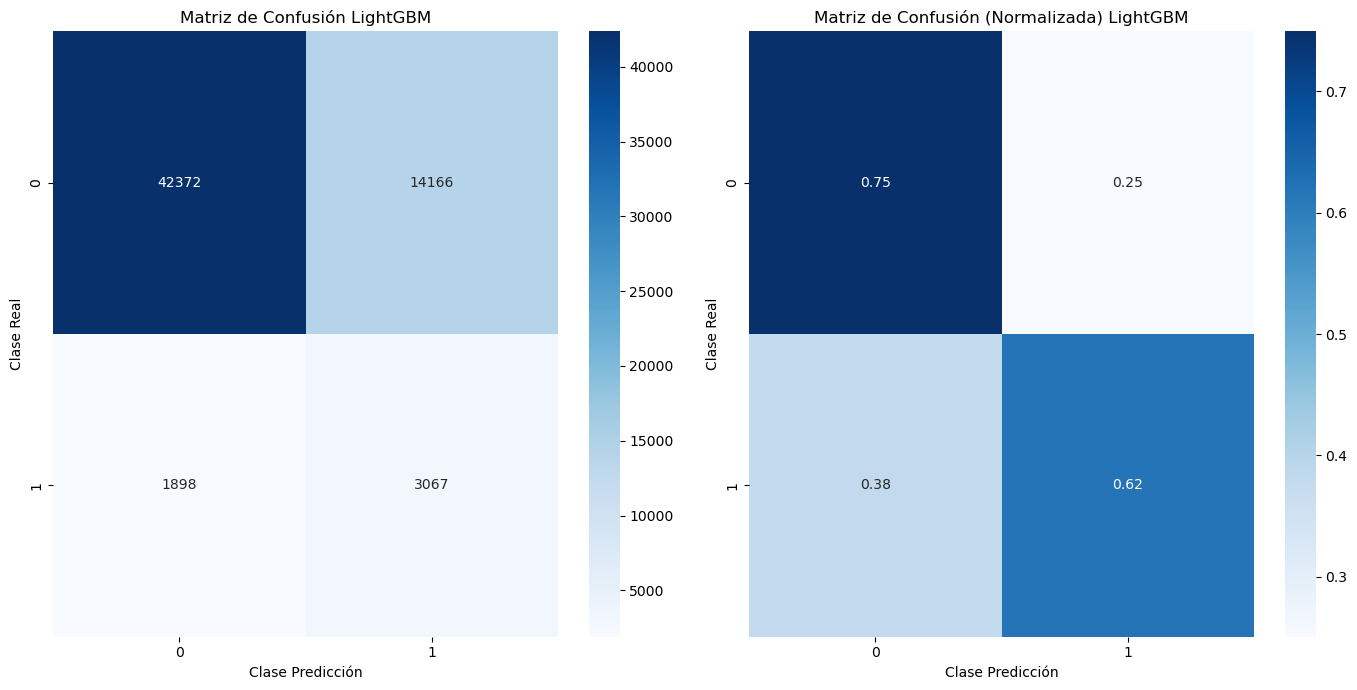

In [15]:
# Mejor modelo después de RandomizedSearchCV
mejor_modelo = modelo_optimo.best_estimator_

# Predicción en el conjunto de prueba
y_pred = mejor_modelo.predict(X_test)

# Matriz de confusión
m1 = confusion_matrix(y_test, y_pred)

# Matriz de confusión normalizada
m_normalizada = m1.astype('float') / m1.sum(axis=1)[:, np.newaxis]

# Crear la figura
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Graficar la matriz de confusión estándar
sns.heatmap(m1, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'], ax=axes[0])
axes[0].set_title('Matriz de Confusión LightGBM')
axes[0].set_xlabel('Clase Predicción')
axes[0].set_ylabel('Clase Real')

# Graficar la matriz de confusión normalizada
sns.heatmap(m_normalizada, annot=True, fmt='.2f', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'], ax=axes[1])
axes[1].set_title('Matriz de Confusión (Normalizada) LightGBM')
axes[1].set_xlabel('Clase Predicción')
axes[1].set_ylabel('Clase Real')
plt.tight_layout()
plt.show()


## **Curva ROC**

[LightGBM] [Warning] Unknown parameter: is_unbalanced


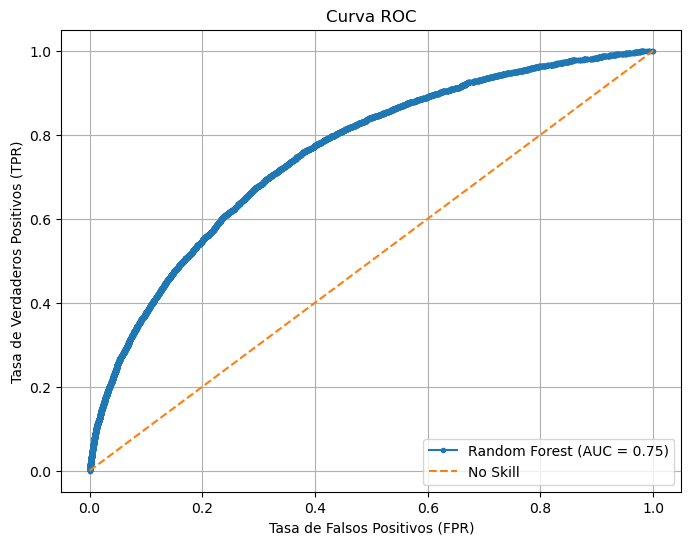

In [24]:
 # Obtener probabilidades para ambas clases
prob_predictions = mejor_modelo.predict_proba(X_test) 

# Probabilidades para la clase positiva (1)
yhat = prob_predictions[:, 1] 

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, yhat)  # Calculamos la Tasa de Falsos Positivos (FPR) y la Tasa de Verdaderos Positivos (TPR)

# Calcular el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)  # Mide rendimiento del modelo

# Grafica curva ROC
plt.figure(figsize=(8, 6))

# Curva ROC del modelo
plt.plot(fpr, tpr, marker='.', label=f'Random Forest (AUC = {roc_auc:.2f})')

# Línea diagonal (representa un clasificador aleatorio)
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')

# Etiquetas de los ejes
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')

# Título
plt.title('Curva ROC')

# Leyenda
plt.legend(loc='lower right')

# Mostrar el gráfico
plt.grid(True)
plt.show()

#### En la anterior curva ROC, se presenta un AUC de 0.75, indicando que el modelo tiene un rendimiento bastante bueno. El valor de AUC, al variar entre 0.5 (modelo aleatorio) y 1.0 (modelo perfecto), se sitúa en un punto intermedio, lo que sugiere que el modelo tiene una capacidad razonable para discriminar entre las clases positivas y negativas. Por lo que en este caso el modelo es capaz de clasificar correctamente los casos positivos y negativos en el 75% de las ocasiones.

In [25]:
gmeans = np.sqrt(tpr * (1-fpr))

In [22]:
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.452589, G-Mean=0.690


#### El presentar un G-Mean de 0.690 refleja que el modelo minimiza errores importantes (falsos positivos y negativos) y logra un buen balance entre precisión y recall.

## **Curva ROC con Threshold**

[LightGBM] [Warning] Unknown parameter: is_unbalanced
Best Threshold = 0.452589


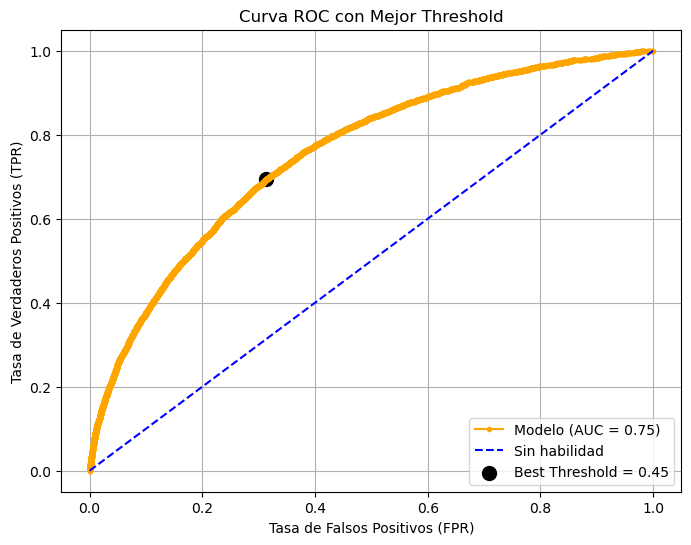

Best Threshold: 0.4525889555377507
AUC: 0.7547930351328733


In [23]:
best_threshold, roc_auc = f_aux.roc_threshold(mejor_modelo, X_test, y_test)

print(f'Best Threshold: {best_threshold}')
print(f'AUC: {roc_auc}')

## **Curva Precision - Recall**

[LightGBM] [Warning] Unknown parameter: is_unbalanced


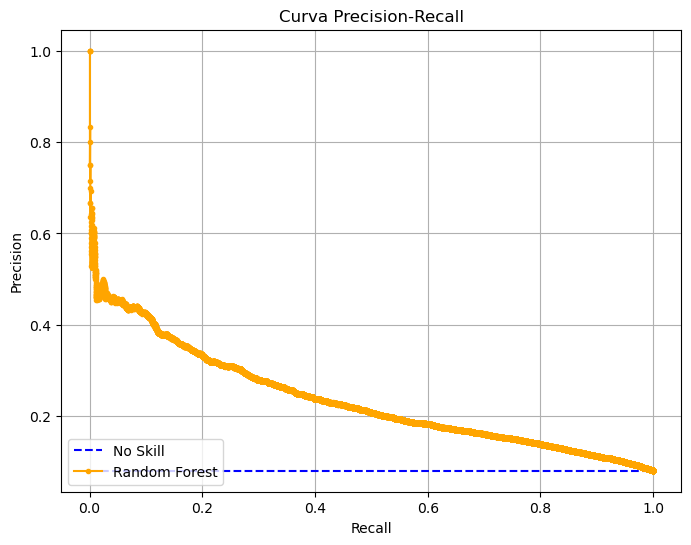

In [24]:
precision, recall, thresholds = f_aux.curva_recall(mejor_modelo, X_test, y_test)

[LightGBM] [Warning] Unknown parameter: is_unbalanced
Best Threshold=0.614354, F-Score=0.300


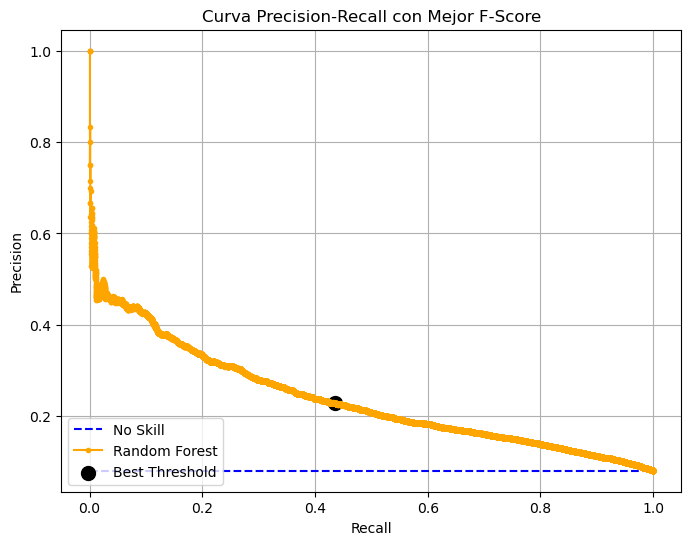

In [40]:
precision, recall, thresholds, best_threshold, best_fscore = f_aux.curva_recall_f(mejor_modelo, X_test, y_test)

#### El presentar un umbal óptimo (Best Threshold = 0.614354) simboliza que el modelo esta buscando activamente el balance entre precisión y recall.

In [41]:
score = f1_score(y_test, prediccion)
print('F-Score: %.5f' % score)

F-Score: 0.27633


#### Se presenta un bajo F-Score como consecuencia del alto desbalance entre clases de las variables de respuesta, reflejando las dificultades del modelo para aprender a predecir correctamente la clase minoritaria

## **Curva de Ganancia Acumulada**

[LightGBM] [Warning] Unknown parameter: is_unbalanced


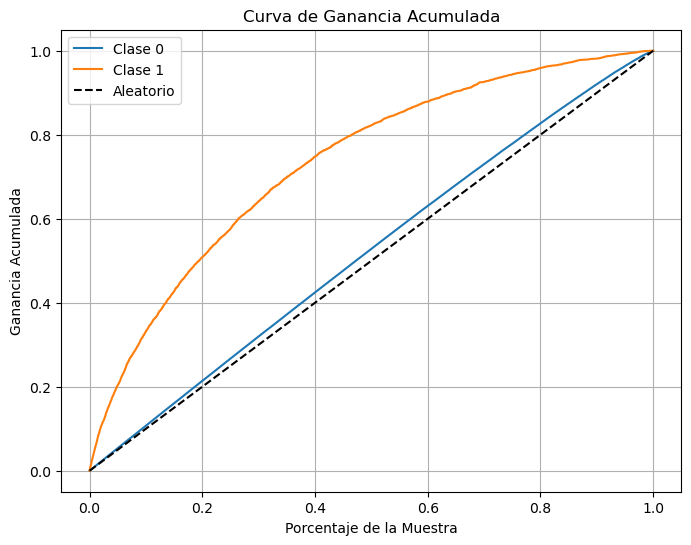

In [26]:
prob_predictions = mejor_modelo.predict_proba(X_test)
f_aux.ganancia_acumulada(y_test, prob_predictions)


#### Como podemos visualizar en la anterior gráfica, presentan distancias muy diferentes, en el caso de que una curva de ganancia acumulada está más cerca de la línea punteada (que representa el rendimiento de un modelo aleatorio), significa que el modelo tiene un rendimiento pobre, ya que no está clasificando correctamente muchas instancias. Esto sugiere que las predicciones del modelo son casi aleatorias. Por el contrario, si la curva está más alejada de la línea punteada, indica que el modelo tiene un buen rendimiento, identificando correctamente las instancias positivas de manera más rápida.

[LightGBM] [Warning] Unknown parameter: is_unbalanced


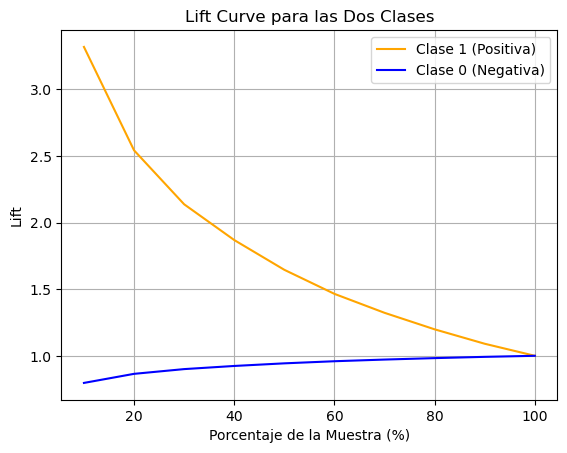

In [28]:
prob_predictions = mejor_modelo.predict_proba(X_test)
f_aux.curva_lift_dos(y_test, prob_predictions)

#### Cuando la curva de Lift de la clase positiva decrece y la de la clase negativa aumenta muy poco, es debido a que el modelo tiene dificultades para identificar correctamente las instancias positivas. Por lo que a medida que el modelo clasifica más muestras, los casos positivos que quedan en el ranking son más difíciles de identificar, lo que causa una disminución en el Lift de la clase positiva. Por otra parte, la clase negativa muestra un aumento muy pequeño en el Lift, lo que puede ser un indicio de que el modelo tiene un desempeño razonable para detectar los casos negativos, pero no mejora sustancialmente a medida que se agregan más muestras. Esto podría deberse a que los negativos están mejor representados en las primeras posiciones del ranking, lo que provoca una mejora más limitada en el rendimiento para esa clase a medida que avanzamos en la clasificación.

## **Conclusiones finales**

#### A lo largo de este trabajo se generaron diversos aprendizajes. El primero de estos fue que el mantener una buena organización al programar te permite desenvolverte de una mejor manera. Tener un código bien estructurado, con funciones claras y variables descriptivas, facilita tanto la comprensión como la posibilidad de hacer modificaciones o mejoras en el futuro. Además, al trabajar en equipo, la organización se convierte en una herramienta esencial para asegurar que todos los miembros puedan entender y contribuir al proyecto de manera eficiente.

#### Por otra parte, un aspecto que consideramos relevante y de cierto modo un factor clave en los resultados obtenidos fue el desbalance entre clases. Al presentar una proporción de 91/9 entre las clases, incluso aplicando diversas técnicas como balanceo de clases, eliminación de nulos y selección de variables, el modelo mostró una tendencia marcada hacia la clase mayoritaria. Esto llevó a una alta precisión al predecir la clase 0, pero un rendimiento considerablemente inferior al identificar la clase minoritaria. Esta situación evidenció la importancia de analizar no solo las métricas generales, sino también las desagregadas por clase para comprender las limitaciones del modelo.

#### Este proyecto dejó en claro que no siempre los modelos o los datos disponibles presentarán el comportamiento ideal. Enfrentarse a desafíos como el desbalance de clases exige una reflexión crítica y una búsqueda constante de alternativas que optimicen el rendimiento, sin perder de vista el contexto del problema. Las métricas obtenidas, con un rango de acierto del 65/45, sirvieron como ejemplo de cómo las limitaciones inherentes a los datos pueden influir significativamente en el desempeño y cómo es crucial buscar métodos para mitigarlas de forma adecuada, fortaleciendo las decisiones futuras en proyectos similares.

#### Finalmente, nos gustaría responder a la pregunta planteada en la primera práctica, donde se busca determinar si ¿Hay algún tipo de clientes más propenso a no devolver un préstamo? Esta pregunta podría responderse de manera sencilla analizando las variables seleccionadas y los resultados generados por los modelos, pero consideramos crucial tomar en cuenta el lado humano, dejando de lado exclusivamente la perspectiva estadística y computacional. Esto es importante porque existen variables que, aunque puedan ser útiles desde el punto de vista predictivo, no deberían ser consideradas al momento de otorgar un préstamo, especialmente cuando su inclusión puede generar sesgos o reforzar desigualdades sociales.

#### El análisis de datos computacional, si no cuenta con una adecuada supervisión humana, puede perpetuar o incluso exacerbar discriminación, racismo u otros tipos de desigualdades. Esto ocurre porque los modelos tienden a aprender de los datos históricos, los cuales podrían contener sesgos implícitos derivados de decisiones humanas pasadas. Por ejemplo, variables como el género, la etnicidad o nivel socioeconómico pueden influir en los resultados del modelo, llevando a decisiones injustas o discriminatorias. Es fundamental recordar que los datos no son neutros, y su interpretación debe ser realizada con una perspectiva ética que considere el impacto social de las predicciones. En este contexto, una supervisión responsable no solo mejora la calidad del análisis, sino que también ayuda a construir modelos que sean justos y éticamente sólidos.

#### Una propuesta interesante que podría derivarse de este modelo, y que podría presentarse como sugerencia al banco, es analizar por qué a ciertas personas no se les concedió el préstamo. Esto podría complementarse con un segundo modelo que, basado en las mismas variables analizadas, estime cuánto esta persona podría permitirse aforar. De esta manera, no solo se reduce la pérdida potencial, sino que también se abre la puerta a retener al cliente, ofreciendo alternativas que no solo beneficien al banco, sino que también fortalezcan la relación y la confianza con el cliente. Esta estrategia no solo mejora la experiencia del usuario, sino que también impulsa la sostenibilidad del negocio en el largo plazo.
